# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [1]:
# Your code here
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\joaop\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Importing data section

In [2]:
fraud_detection=pd.read_csv(filepath_or_buffer="C:\\Users\\joaop\\Downloads\\1069_1940_bundle_archive\\PS_20174392719_1491204439457_log.csv",
    sep=',',
    nrows=100000)

fraud_detection.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
fraud_detection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


In [4]:
#evaluating dtypes:
fraud_detection.columns.to_series().groupby(fraud_detection.dtypes).groups

{dtype('int64'): Index(['step', 'isFraud', 'isFlaggedFraud'], dtype='object'),
 dtype('float64'): Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
        'newbalanceDest'],
       dtype='object'),
 dtype('O'): Index(['type', 'nameOrig', 'nameDest'], dtype='object')}

In [5]:
#examining steps feature
fraud_detection[fraud_detection['step']!=1].head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2708,2,PAYMENT,1826.81,C70165127,24622.0,22795.19,M2026706491,0.0,0.0,0,0
2709,2,PAYMENT,7709.20,C520830206,52152.0,44442.80,M351216770,0.0,0.0,0,0
2710,2,PAYMENT,3023.16,C1705281026,178.0,0.00,M1967667267,0.0,0.0,0,0


# Checking features...

In [6]:
#examining nameOrig feature
#we can drop it...
len(fraud_detection['nameOrig'].unique())

100000

In [7]:
#examining nameOrig feature
#we can drop it...
len(fraud_detection['nameDest'].unique())

51551

In [8]:
#examining type feature
#we can drop it...
print("There are "+str(len(fraud_detection['type'].unique()))+" types of payment in the db.")
fraud_detection['type'].unique()

There are 5 types of payment in the db.


array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [9]:
#examining count of isFraud
is_Fraud=fraud_detection[fraud_detection['isFraud']==1]
print("number of frauds: "+str(is_Fraud.count()[0]))
not_Fraud=fraud_detection[fraud_detection['isFraud']==0]
print("number of NOT frauds: "+str(not_Fraud.count()[0]))

#creating DF by type
by_type=fraud_detection.groupby(by='type').sum()

number of frauds: 116
number of NOT frauds: 99884


In [10]:
#ratio of frauds in the n=100000 sample:
print("Percentage of fraudulent payments in our sample: "+str(fraud_detection[fraud_detection['isFraud']==1].count()[0]/len(fraud_detection)))

print("Clearly the target variable 'isFraud' is imbalanced in our dataset.")

Percentage of fraudulent payments in our sample: 0.00116
Clearly the target variable 'isFraud' is imbalanced in our dataset.


# Descriptive stats

In [11]:
not_Fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,99884.000000,9.988400e+04,9.988400e+04,9.988400e+04,9.988400e+04,9.988400e+04,99884.0,99884.0
mean,8.502833,1.731749e+05,8.781350e+05,8.950665e+05,8.812633e+05,1.184652e+06,0.0,0.0
std,1.821599,3.403085e+05,2.674184e+06,2.712715e+06,2.403145e+06,2.803045e+06,0.0,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
25%,8.000000,9.952892e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
50%,9.000000,5.275968e+04,2.004924e+04,0.000000e+00,2.092167e+04,5.020784e+04,0.0,0.0
75%,10.000000,2.117022e+05,1.900478e+05,2.153404e+05,5.891467e+05,1.058797e+06,0.0,0.0
max,10.000000,6.419835e+06,3.379739e+07,3.400874e+07,3.400874e+07,3.894623e+07,0.0,0.0


In [12]:
is_Fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,116.000000,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,116.0,116.0
mean,5.750000,5.415784e+05,5.527101e+05,2.908048e+04,2.273482e+05,6.582112e+05,1.0,0.0
std,2.867737,1.535067e+06,1.710291e+06,2.748190e+05,1.314006e+06,2.063282e+06,0.0,0.0
min,1.000000,1.640000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0
25%,4.000000,1.724600e+04,1.370633e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0
50%,6.000000,3.907782e+04,3.052102e+04,0.000000e+00,0.000000e+00,2.277960e+03,1.0,0.0
75%,8.000000,2.961546e+05,2.486596e+05,0.000000e+00,1.122675e+04,1.857186e+05,1.0,0.0
max,10.000000,1.000000e+07,1.293042e+07,2.930418e+06,1.301050e+07,1.307123e+07,1.0,0.0


In [13]:
#examining count of isFlaggedFraud
#we conclude there is no positive isFlaggedFraud
fraud_detection[fraud_detection['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [14]:
#detection of null values:
fraud_detection.isnull().sum().sum()

0

### What is the distribution of the outcome? 

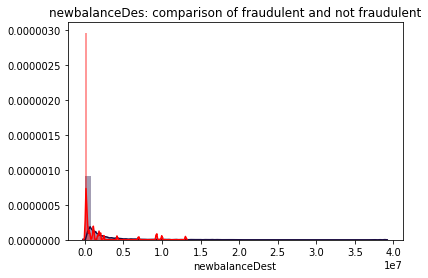

In [15]:
with sns.color_palette("inferno", 8):
    sns.distplot(fraud_detection['newbalanceDest'], hist=True)
    sns.distplot(is_Fraud['newbalanceDest'], hist=True, color='r')
    plt.title('newbalanceDes: comparison of fraudulent and not fraudulent')
    plt.show()

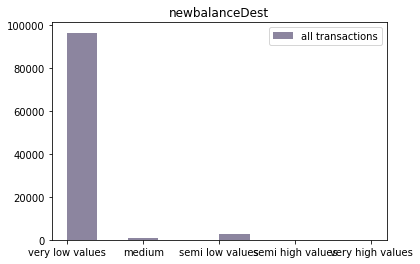

In [16]:
# Your response here
fraud_detection_binned=pd.cut(fraud_detection['newbalanceDest'], bins=5,labels=["very low values", "semi low values","medium","semi high values", "very high values"], right=True)

#distribution of frauds
with sns.color_palette("inferno", 8):
    plt.hist(fraud_detection_binned, alpha=0.5, label='all transactions')
    plt.legend(loc='upper right')
    plt.title('newbalanceDest')
    plt.show()

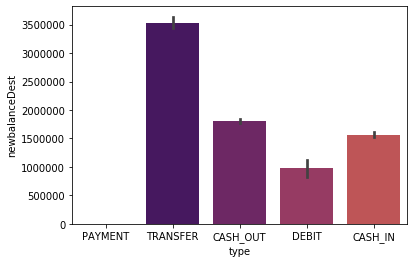

In [17]:
with sns.color_palette("inferno", 8):
   _ = sns.barplot(x='type',y='newbalanceDest',data=fraud_detection)

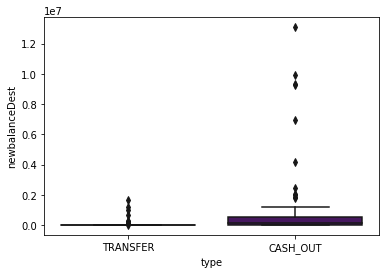

In [18]:
with sns.color_palette("inferno", 8):
   _ = sns.boxplot(x='type',y='newbalanceDest',data=is_Fraud)

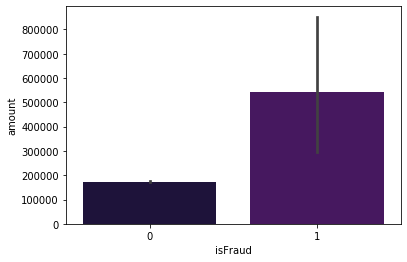

In [19]:
with sns.color_palette("inferno", 8):
   _ = sns.barplot(x='isFraud',y='amount',data=fraud_detection)

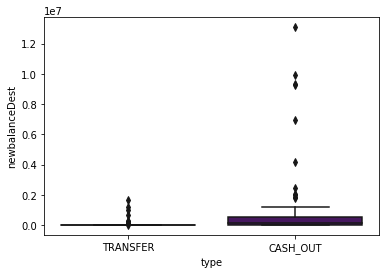

In [20]:
with sns.color_palette("inferno", 8):
   _ = sns.boxplot(x='type',y='newbalanceDest',data=is_Fraud)

In [21]:
#distribution of frauds by type
by_type_frauds=by_type[by_type['isFraud']==1]

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [22]:
# Your code here

#dropping useless features
cleaned_fraud_detection=fraud_detection.drop(labels=['nameOrig','nameDest', 'isFlaggedFraud'], axis=1)
cleaned_fraud_detection.head(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [23]:
'''Inclusion of the time variable: 'step'  '''
#regarding the step... I guess 1 step is equivalent to an hour. so we can hot encode it.

print("cardinality of 'step' is: "+str(len(fraud_detection['step'].unique())))

cardinality of 'step' is: 10


In [24]:
#converting the type [categorical var] column through one hot encoding
cleaned_fraud_detection=pd.get_dummies(cleaned_fraud_detection, columns=['step','type'])
cleaned_fraud_detection.head(5)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,step_1,step_2,step_3,step_4,...,step_6,step_7,step_8,step_9,step_10,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,181.00,181.0,0.00,0.0,0.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,181.00,181.0,0.00,21182.0,0.0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Run a logisitc regression classifier and evaluate its accuracy.

In [25]:
# Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [26]:
#data gym: training and testing.

y=cleaned_fraud_detection['isFraud']
x=cleaned_fraud_detection.drop('isFraud', axis=1)

X_train, X_test, y_train, y_test=train_test_split(x, y, train_size=0.8)

In [27]:
logistic_model=LogisticRegression(n_jobs=-1) #-1 means using all processors
'''
# The number of jobs to use for the computation.
This will only provide speedup for n_targets > 1 and sufficient large problems.  -1 means using all processors.
'''

logistic_model=logistic_model.fit(X_train, y_train)
logistic_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
logistic_model_score_train=logistic_model.score(X_train,y_train)
print(f"The score of the logistic regression with the training data is: {logistic_model_score_train}.")

logistic_model=logistic_model.fit(X_test, y_test)


logistic_model_score_test=logistic_model.score(X_test,y_test)
print(f"The score of the logistic regression with the testing data is: {logistic_model_score_test}.")

The score of the logistic regression with the training data is: 0.999275.
The score of the logistic regression with the testing data is: 0.99935.


In [29]:
'''oversampling to not overfit.'''

from sklearn.utils import resample

#concatenate our training data back together
X=pd.concat([X_train,y_train],axis=1)

In [30]:
#separate minority and majority classes
NOT_Fraud=cleaned_fraud_detection[cleaned_fraud_detection.isFraud==0]
Fraud=cleaned_fraud_detection[cleaned_fraud_detection.isFraud==1]

In [31]:
#downsample majority
NOT_fraud_downsampled=resample(NOT_Fraud,
                         replace=True, #sample with replacement
                         n_samples=len(Fraud), #match number in majority class
                         random_state=27) #reproducible results

#checking if they have the same shape:
print(NOT_fraud_downsampled.isFraud.value_counts())
print(Fraud.isFraud.value_counts())

final_df=pd.concat([Fraud,NOT_fraud_downsampled],axis=1)

0    116
Name: isFraud, dtype: int64
1    116
Name: isFraud, dtype: int64


In [32]:
'''or we could upsample!
#upsample minority
fraud_upsampled=resample(Fraud,
                         replace=True, #sample with replacement
                         n_samples=len(NOT_Fraud), #match number in majority class
                         random_state=27) #reproducible results
#checking if they have the same shape:
print(fraud_upsampled.isFraud.value_counts())
print(NOT_Fraud.isFraud.value_counts())


final_df=pd.concat([NOT_Fraud,fraud_upsampled],axis=1)
'''

'or we could upsample!\n#upsample minority\nfraud_upsampled=resample(Fraud,\n                         replace=True, #sample with replacement\n                         n_samples=len(NOT_Fraud), #match number in majority class\n                         random_state=27) #reproducible results\n\nfinal_df=pd.concat([NOT_Fraud,fraud_upsampled],axis=1)\n'

In [38]:
#data gym: training and testing the downsampled db sample

y=final_df['isFraud']
x=final_df.drop('isFraud', axis=1)


X_train, X_test, y_train, y_test=train_test_split(x, y, train_size=0.8)

In [39]:
logistic_model_score_train=logistic_model.score(X_train,y_train)
print(f"The score of the logistic regression with the training data is: {logistic_model_score_train}.")

logistic_model=logistic_model.fit(X_test, y_test)


logistic_model_score_test=logistic_model.score(X_test,y_test)
print(f"The score of the logistic regression with the testing data is: {logistic_model_score_test}.")

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Now pick a model of your choice and evaluate its accuracy.

# KNeighborsClassifier

In [ ]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClassifier_model=KNeighborsClassifier() #-1 means using all processors
'''
# The number of jobs to use for the computation.
This will only provide speedup for n_targets > 1 and sufficient large problems.  -1 means using all processors.
'''

KNeighborsClassifier_model=KNeighborsClassifier_model.fit(X_train, y_train)
KNeighborsClassifier_model

In [ ]:
KNeighborsClassifier_model_score_train=KNeighborsClassifier_model.score(X_train,y_train)
print(f"The score of the KNeighborsRegressor with the training data is: {KNeighborsClassifier_model_score_train}.")

KNeighborsClassifier_model=KNeighborsClassifier_model.fit(X_test, y_test)

KNeighborsClassifier_model_score_test=KNeighborsClassifier_model.score(X_test,y_test)
print(f"The score of the KNeighborsRegressor with the testing data is: {KNeighborsClassifier_model_score_test}.")

# Random forest

In [ ]:
# Your code here
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier_model=RandomForestClassifier() #-1 means using all processors
'''
# The number of jobs to use for the computation.
This will only provide speedup for n_targets > 1 and sufficient large problems.  -1 means using all processors.
'''

RandomForestClassifier_model=RandomForestClassifier_model.fit(X_train, y_train)
RandomForestClassifier_model

In [ ]:
RandomForestClassifier_model_score_train=RandomForestClassifier_model.score(X_train,y_train)
print(f"The score of the RandomForestClassifier with the training data is: {RandomForestClassifier_model_score_train}.")

RandomForestClassifier_model=RandomForestClassifier_model.fit(X_test, y_test)

RandomForestClassifier_model_score_test=RandomForestClassifier_model.score(X_test,y_test)
print(f"The score of the RandomForestClassifier with the testing data is: {RandomForestClassifier_model_score_test}.")

### Which model worked better and how do you know?

In [ ]:
# Your response here
'''
Logistic Regression and KNN Classifiers don't work well with imbalanced data...
Random forest tends to be the best choice.
'''

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.